# Exploratory Data Analysis of Features
Perform in-depth EDA to understand relationships between features and success metrics. This includes statistical analysis and visualizations to identify patterns and potential predictors of success.

In [1]:
# Import required libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from matplotlib.backends.backend_pdf import PdfPages
import scipy.stats as stats

# Set style for better visualizations
# Using a valid matplotlib style instead of 'seaborn' which is not a valid style name
# Available seaborn styles include: 'seaborn-v0_8', 'seaborn-v0_8-darkgrid', 'seaborn-v0_8-whitegrid', etc.
plt.style.use('seaborn-v0_8')  # Using the base seaborn style with version specification

# Print available styles for debugging if needed
# print("Available matplotlib styles:", plt.style.available)

# Set seaborn palette separately
sns.set_palette("husl")

In [2]:
# Load the data
print("Loading engineered features dataset...")
df = pd.read_csv('engineered_features.csv')
print(f"Loaded {df.shape[0]} rows and {df.shape[1]} columns")

Loading engineered features dataset...
Loaded 196553 rows and 86 columns


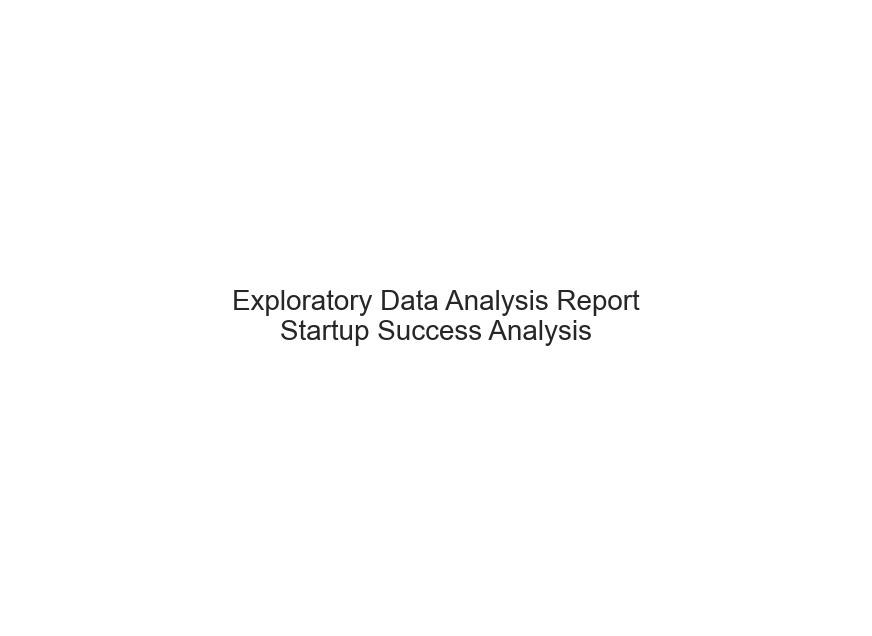

In [3]:
# Create PDF for saving all visualizations
pdf = PdfPages('detailed_eda_report.pdf')

# Add title page
plt.figure(figsize=(11, 8))
plt.text(0.5, 0.5, 'Exploratory Data Analysis Report\nStartup Success Analysis', 
         horizontalalignment='center', verticalalignment='center', 
         fontsize=20)
plt.axis('off')
pdf.savefig()
plt.show()

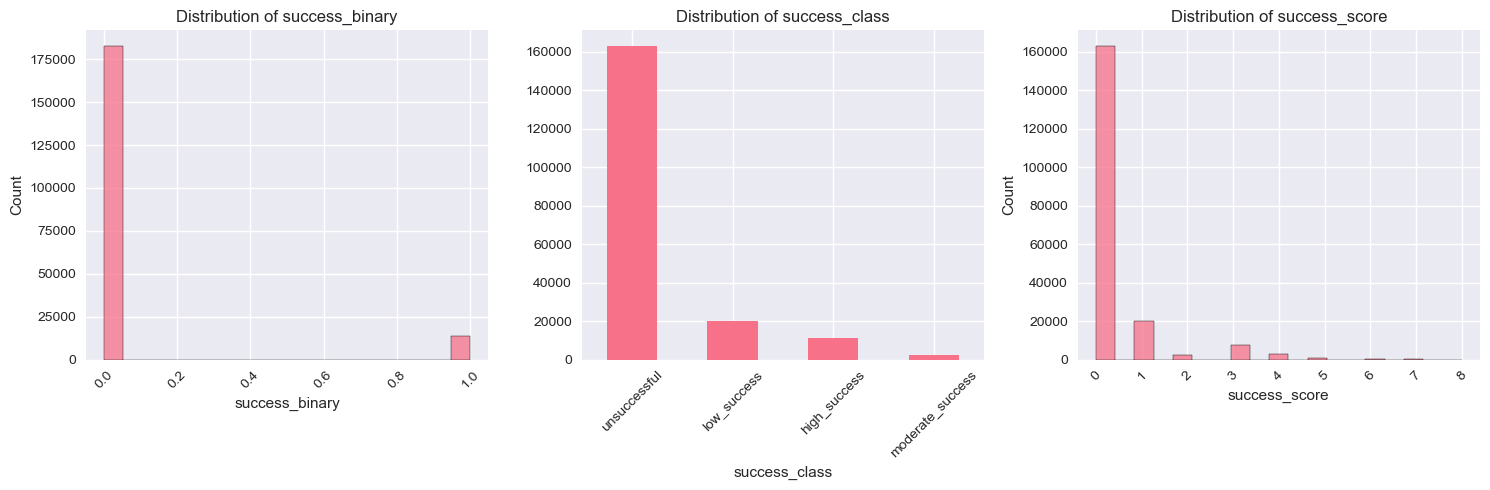

In [4]:
# Analyze success metrics distribution
success_metrics = ['success_binary', 'success_class', 'success_score']

plt.figure(figsize=(15, 5))
for i, metric in enumerate(success_metrics, 1):
    plt.subplot(1, 3, i)
    if df[metric].dtype in ['int64', 'float64']:
        sns.histplot(data=df, x=metric)
    else:
        df[metric].value_counts().plot(kind='bar')
    plt.title(f'Distribution of {metric}')
    plt.xticks(rotation=45)
plt.tight_layout()
pdf.savefig()
plt.show()

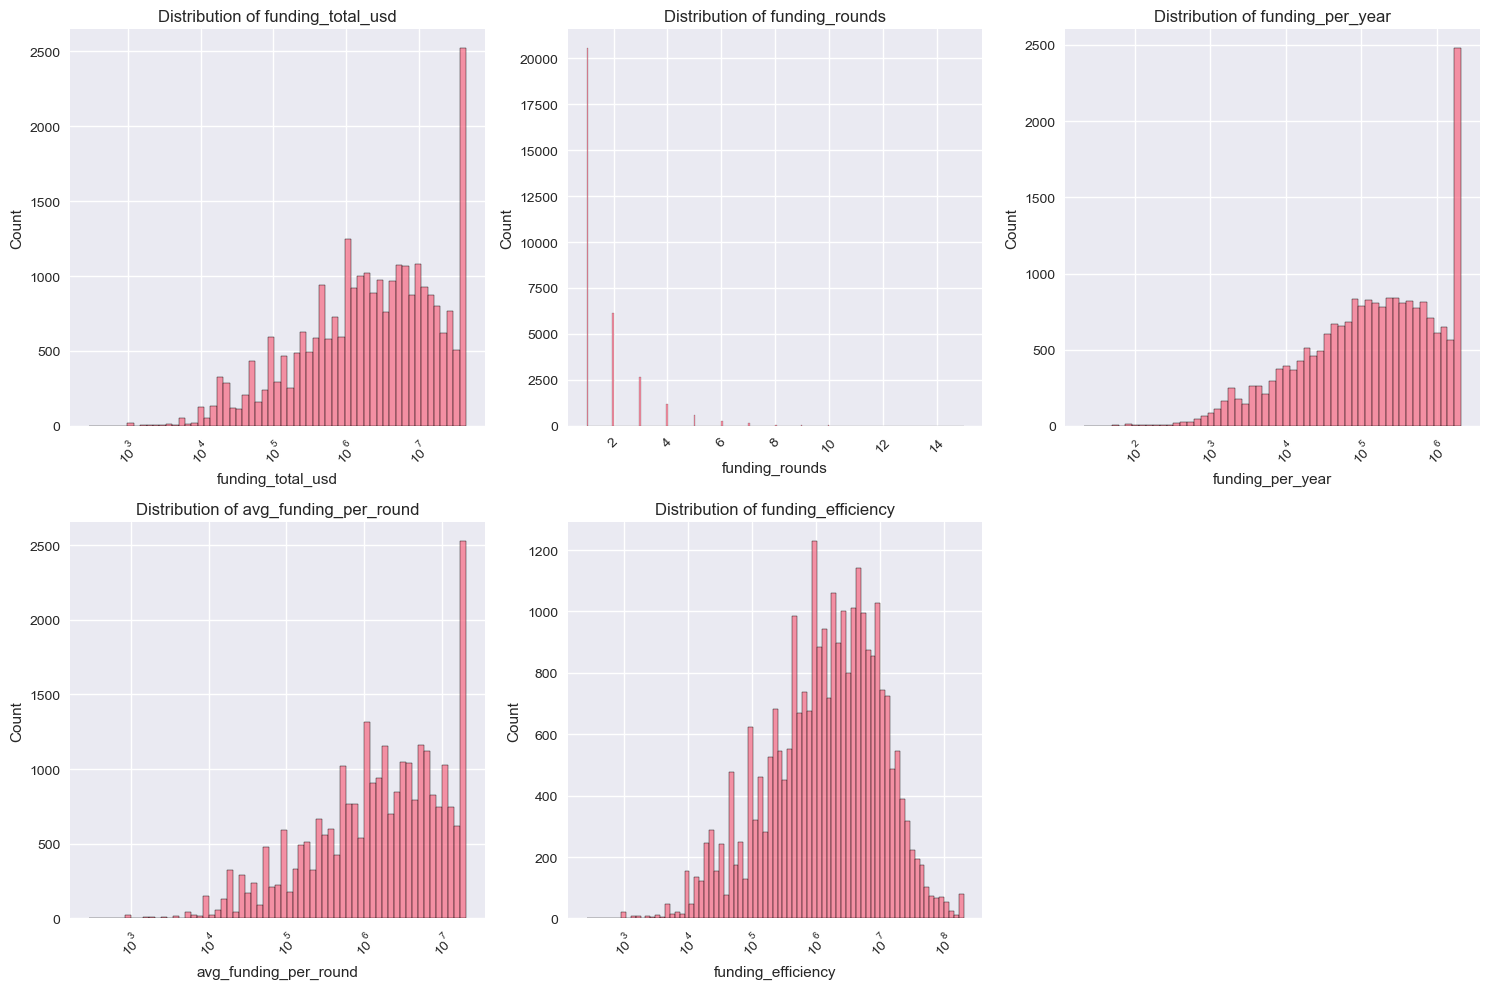

In [5]:
# Analyze financial patterns
financial_metrics = ['funding_total_usd', 'funding_rounds', 'funding_per_year', 
                    'avg_funding_per_round', 'funding_efficiency']

plt.figure(figsize=(15, 10))
for i, metric in enumerate(financial_metrics, 1):
    plt.subplot(2, 3, i)
    # Use log scale for monetary values
    if 'funding' in metric and 'rounds' not in metric:
        sns.histplot(data=df[df[metric] > 0], x=metric, log_scale=True)
    else:
        sns.histplot(data=df[df[metric] > 0], x=metric)
    plt.title(f'Distribution of {metric}')
    plt.xticks(rotation=45)
plt.tight_layout()
pdf.savefig()
plt.show()

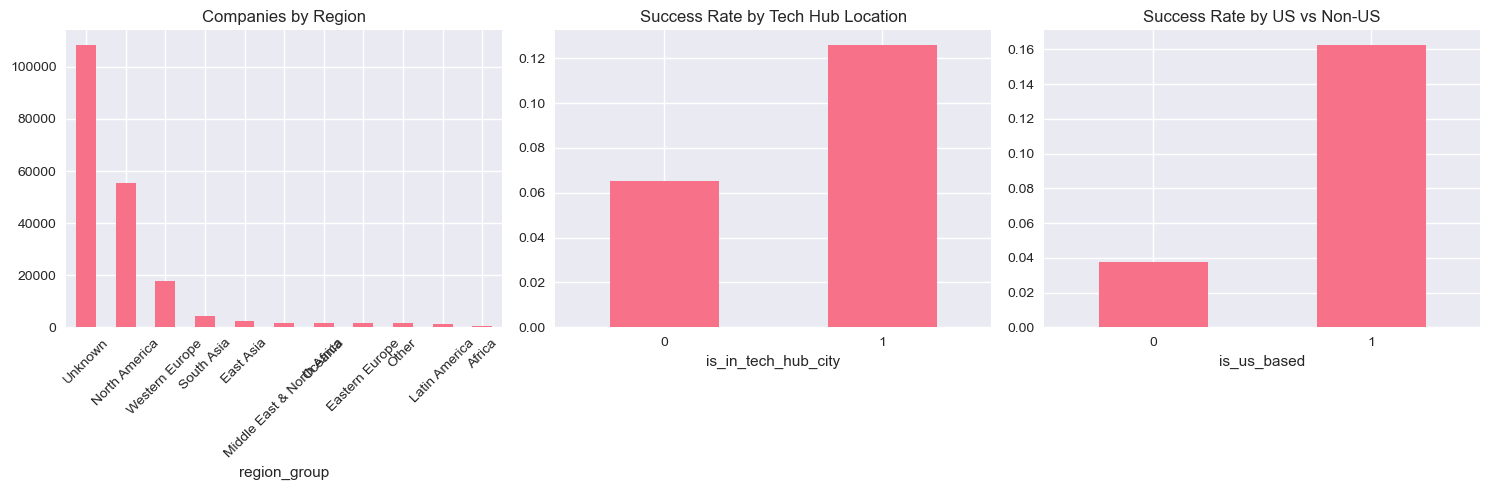

In [6]:
# Analyze geographic patterns
plt.figure(figsize=(15, 5))

# Region distribution
plt.subplot(1, 3, 1)
df['region_group'].value_counts().plot(kind='bar')
plt.title('Companies by Region')
plt.xticks(rotation=45)

# Tech hub analysis
plt.subplot(1, 3, 2)
df.groupby('is_in_tech_hub_city')['success_binary'].mean().plot(kind='bar')
plt.title('Success Rate by Tech Hub Location')
plt.xticks(rotation=0)

# US vs Non-US
plt.subplot(1, 3, 3)
df.groupby('is_us_based')['success_binary'].mean().plot(kind='bar')
plt.title('Success Rate by US vs Non-US')
plt.xticks(rotation=0)

plt.tight_layout()
pdf.savefig()
plt.show()

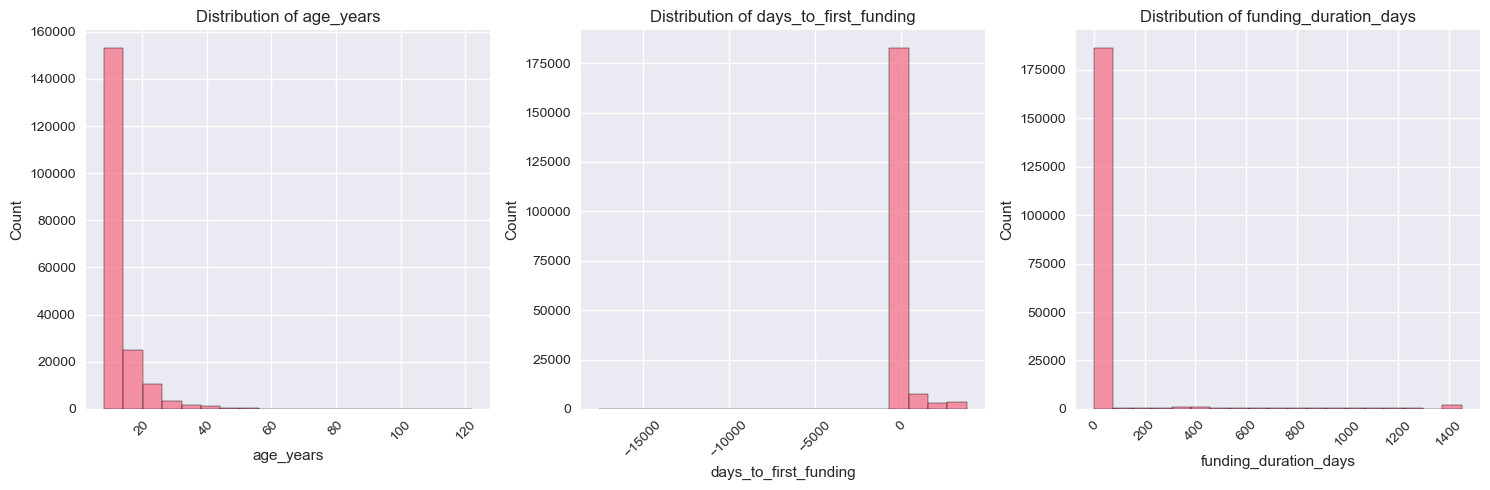

In [7]:
# Analyze temporal patterns
temporal_metrics = ['age_years', 'days_to_first_funding', 'funding_duration_days']

plt.figure(figsize=(15, 5))
for i, metric in enumerate(temporal_metrics, 1):
    plt.subplot(1, 3, i)
    sns.histplot(data=df[df[metric].notna()], x=metric)
    plt.title(f'Distribution of {metric}')
    plt.xticks(rotation=45)
plt.tight_layout()
pdf.savefig()
plt.show()

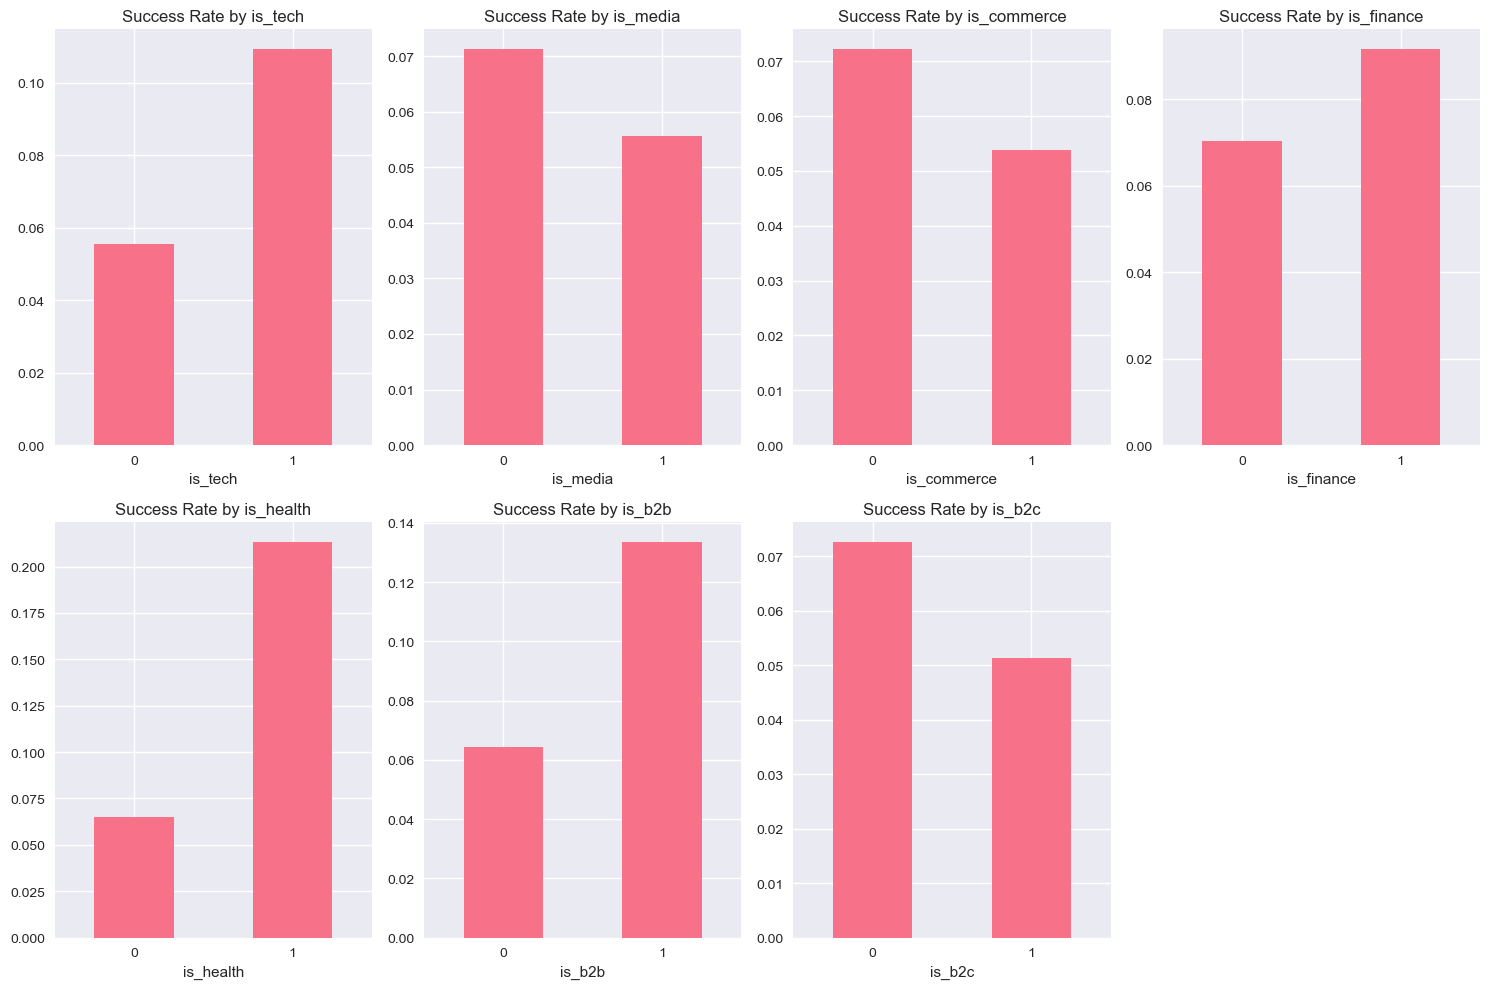

In [8]:
# Analyze business categories
category_metrics = ['is_tech', 'is_media', 'is_commerce', 'is_finance', 
                   'is_health', 'is_b2b', 'is_b2c']

plt.figure(figsize=(15, 10))
# Success rate by category
for i, metric in enumerate(category_metrics, 1):
    plt.subplot(2, 4, i)
    df.groupby(metric)['success_binary'].mean().plot(kind='bar')
    plt.title(f'Success Rate by {metric}')
    plt.xticks(rotation=0)
plt.tight_layout()
pdf.savefig()
plt.show()

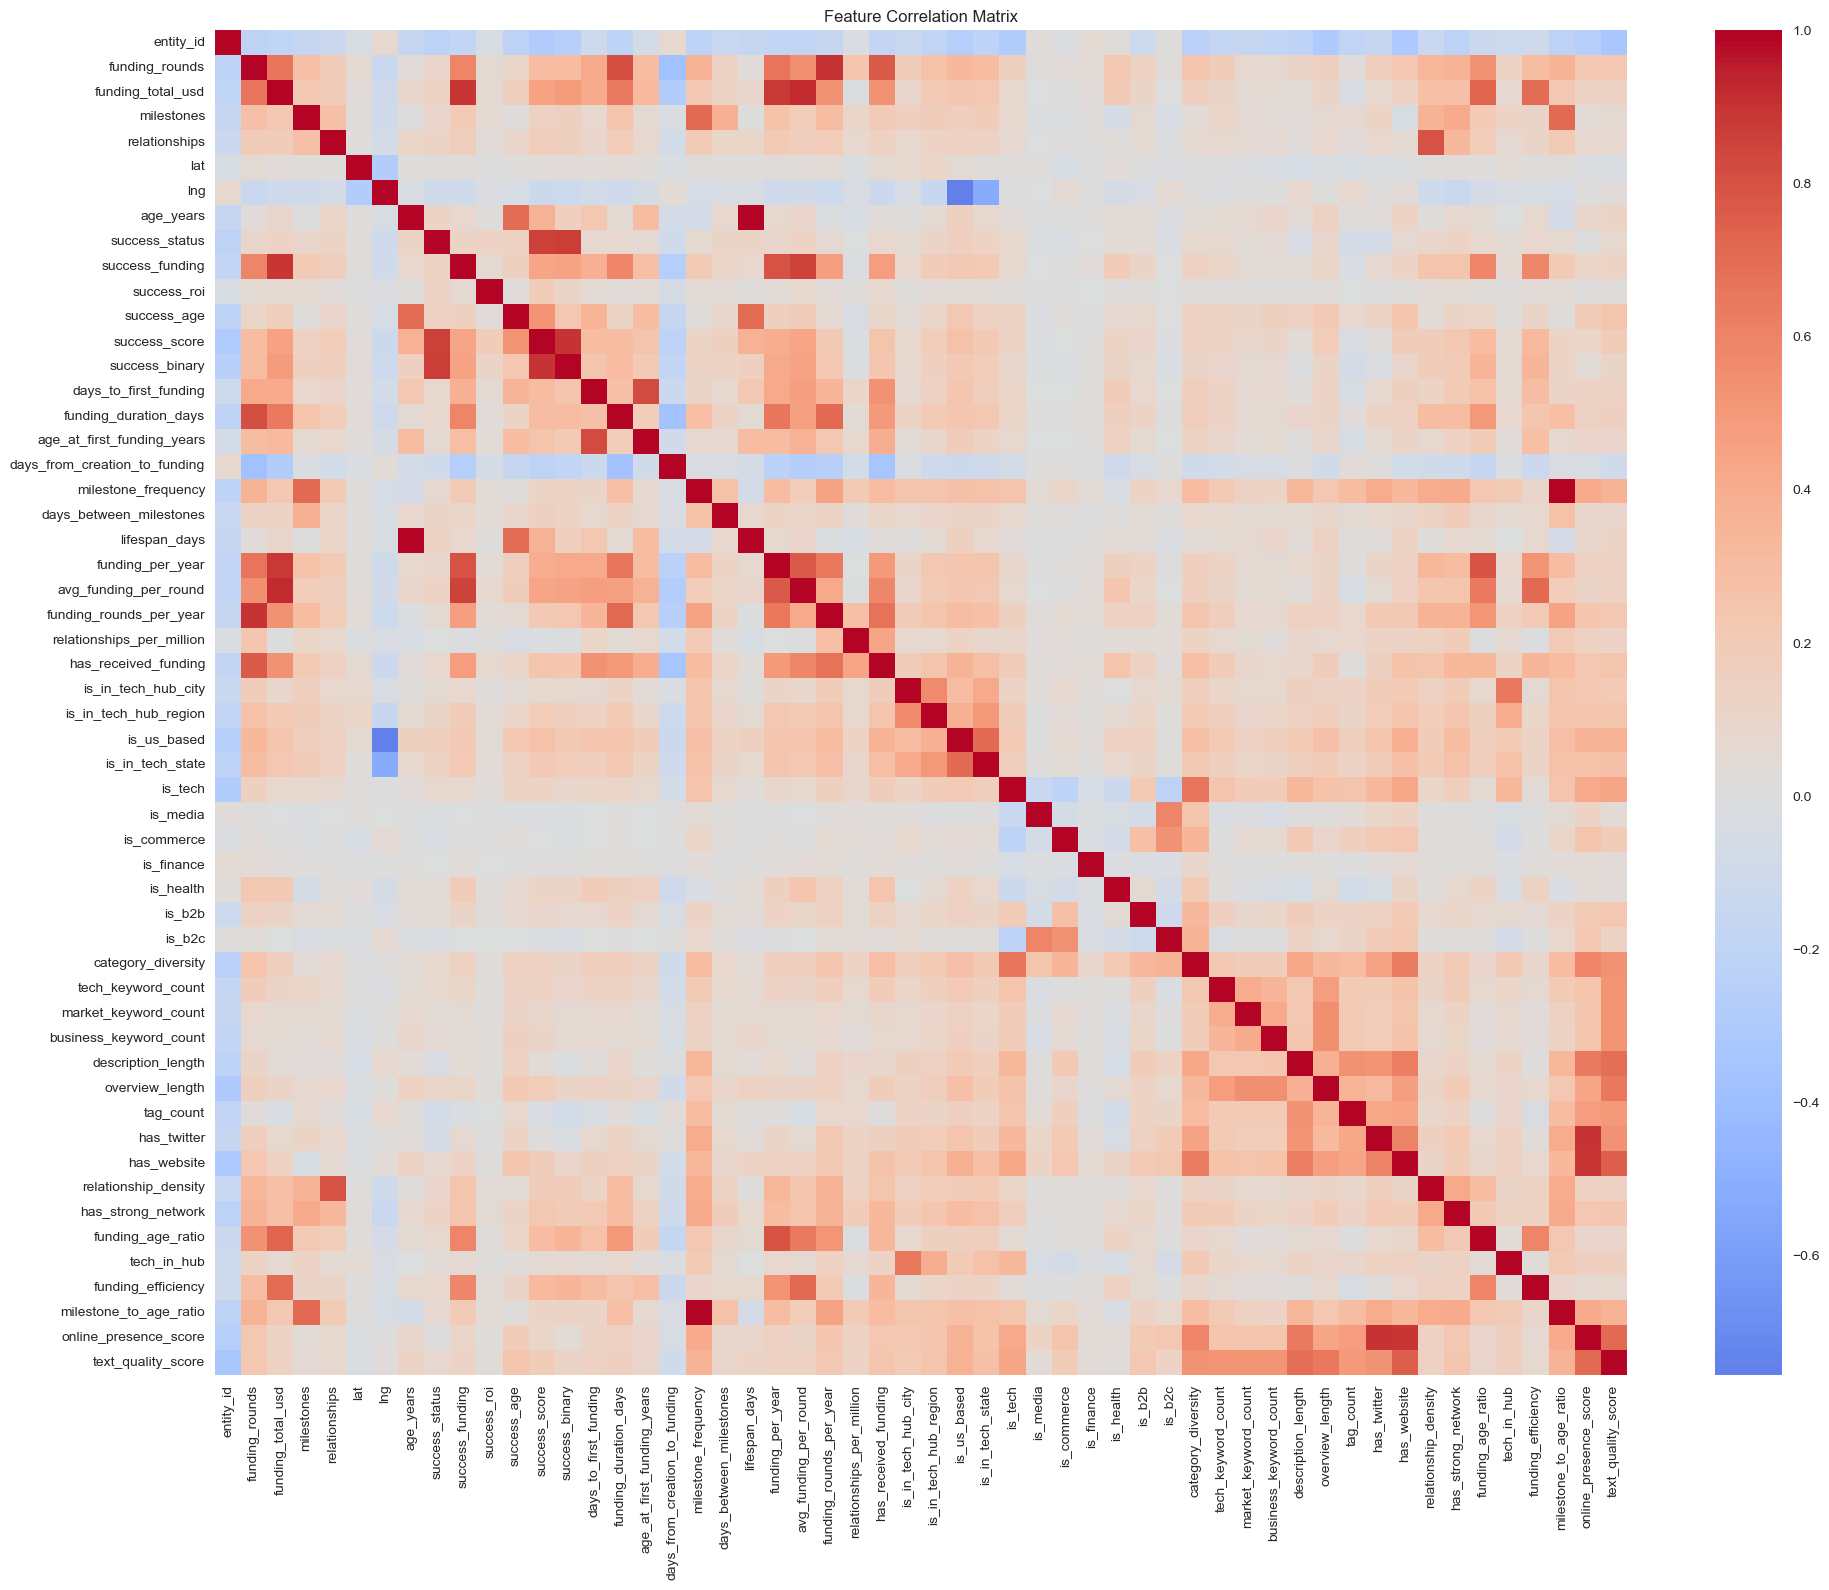

In [9]:
# Create correlation matrix
numeric_cols = df.select_dtypes(include=['float64', 'int64']).columns
corr_matrix = df[numeric_cols].corr()

# Save correlation matrix
corr_matrix.to_csv('correlation_matrix.csv')

# Visualize correlation matrix
plt.figure(figsize=(20, 16))
sns.heatmap(corr_matrix, annot=False, cmap='coolwarm', center=0)
plt.title('Feature Correlation Matrix')
plt.tight_layout()
pdf.savefig()
plt.show()

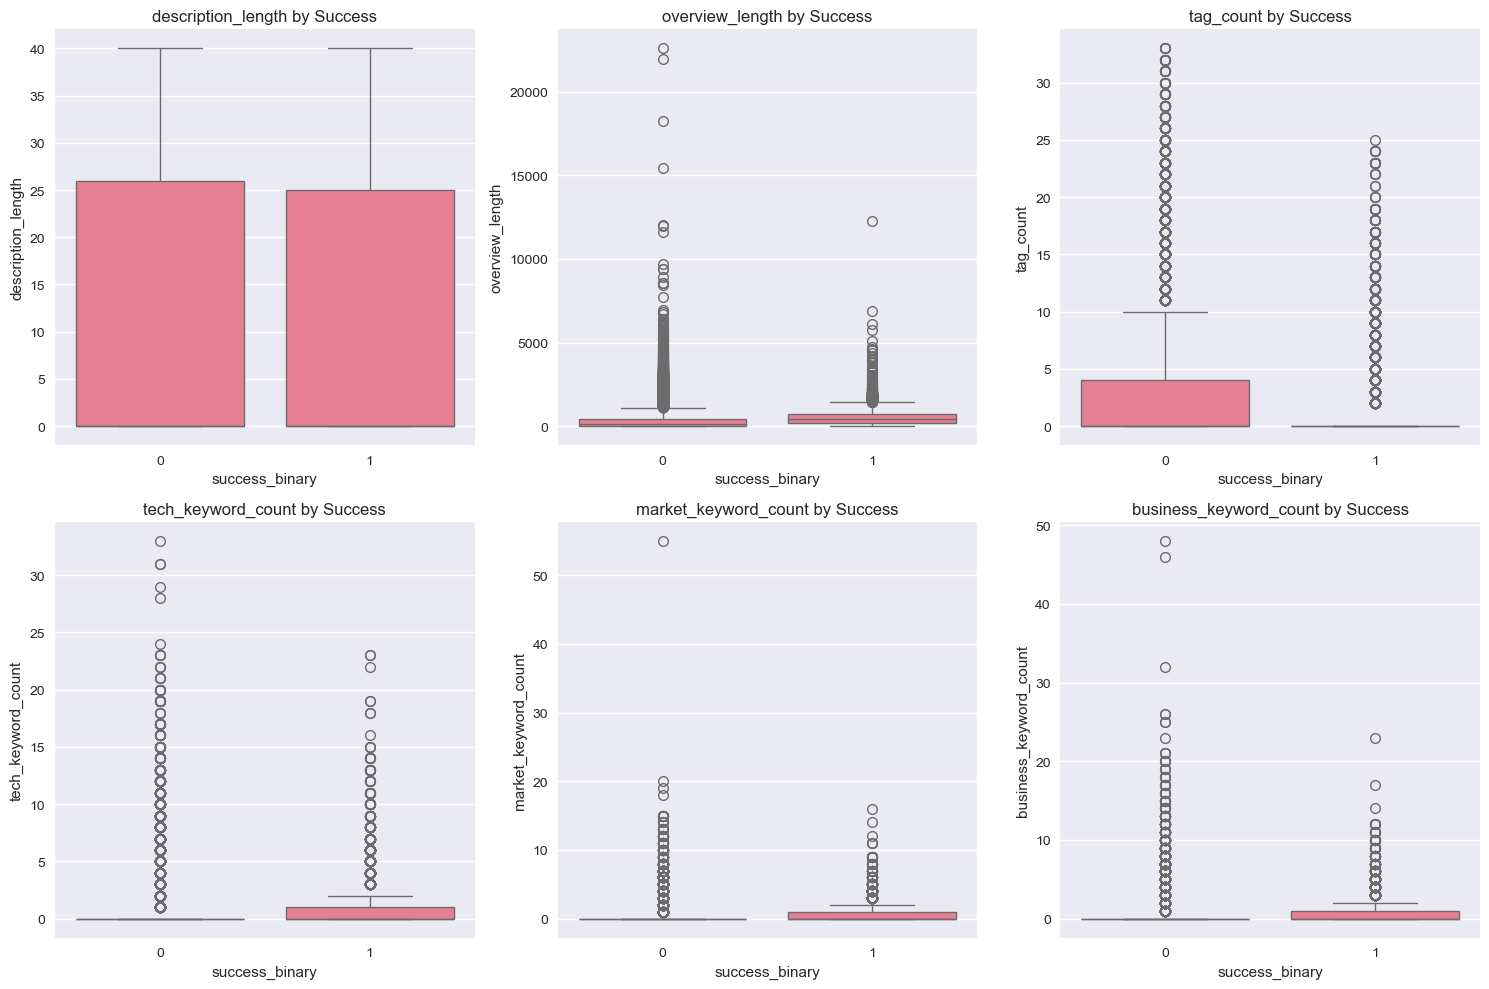

In [10]:
# Analyze text-based features
text_metrics = ['description_length', 'overview_length', 'tag_count',
                'tech_keyword_count', 'market_keyword_count', 'business_keyword_count']

plt.figure(figsize=(15, 10))
for i, metric in enumerate(text_metrics, 1):
    plt.subplot(2, 3, i)
    sns.boxplot(data=df, x='success_binary', y=metric)
    plt.title(f'{metric} by Success')
    plt.xticks(rotation=0)
plt.tight_layout()
pdf.savefig()
plt.show()

In [11]:
# Save and close PDF
pdf.close()
print("Analysis complete. Results saved to 'detailed_eda_report.pdf' and 'correlation_matrix.csv'")

Analysis complete. Results saved to 'detailed_eda_report.pdf' and 'correlation_matrix.csv'
